In [41]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
plt.style.use("ggplot")

In [43]:
baseline_scores = pd.read_pickle("data/04-baseline/baseline_scores.pickle")
coda_scores = pd.read_pickle("data/05-coda/coda_scores.pickle")

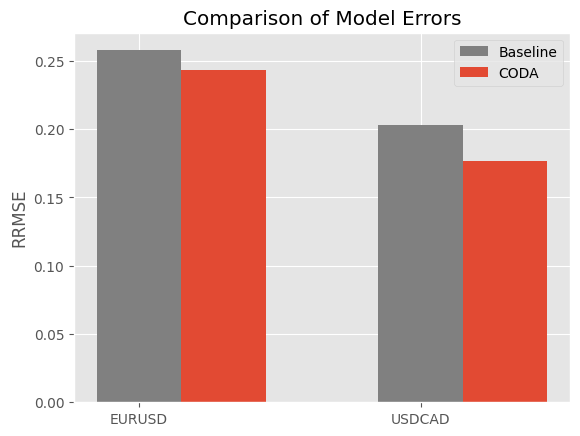

In [44]:
bar_width = 0.30

# Get the indices and positions for the bars
indices = range(len(baseline_scores))
positions = [indices, [i + bar_width for i in indices]]

# Create the bar chart
plt.bar(indices, baseline_scores, bar_width, 
        color='gray', label='Baseline')
plt.bar(positions[1], coda_scores, bar_width, label='CODA')

# Add labels and title
plt.ylabel('RRMSE')
plt.title('Comparison of Model Errors')
plt.xticks(indices, baseline_scores.index)
plt.legend()

plt.savefig("figures/comparison_of_model_errors.png", bbox_inches='tight')

plt.show()

In [45]:
y_test = pd.read_pickle("data/05-coda/y_on_pred_index.pickle")
y_test_pred = pd.read_pickle("data/05-coda/coda_preds.pickle")

# Convert PeriodIndex to DatetimeIndex
y_test.index = y_test.index.to_timestamp()
y_test_pred.index = y_test_pred.index.to_timestamp()

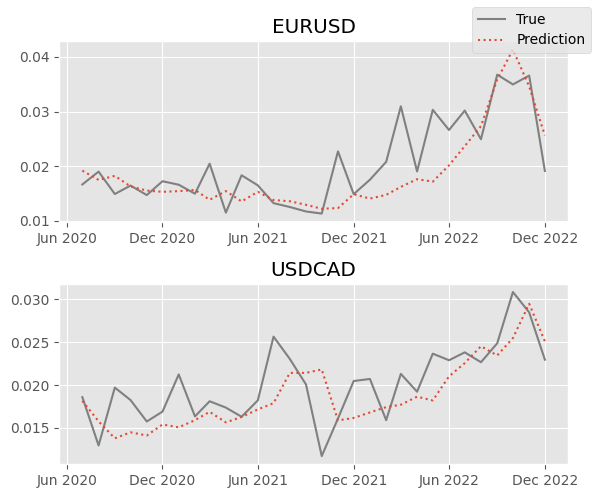

In [46]:
# Get the column names (securities)
securities = y_test.columns

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(6, 5))

# Plot the true values and predictions for each security
for i, security in enumerate(securities):
    ax = axes[i]
    ax.plot(y_test.index, y_test[security], color='gray', label='True')
    ax.plot(y_test_pred.index, y_test_pred[security], linestyle='dotted', label='Prediction')

    # Set dates in European format
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    
    # Set the x-axis tick frequency to every six months
    ax.xaxis.set_major_locator(plt.FixedLocator(ax.get_xticks()[::6]))

    ax.set_title(security)
    
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout()

plt.savefig("figures/comparison_of_model_forecasts.png", bbox_inches='tight')

plt.show()